# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key
weather_api_key = "cec57c519290146f9db7fd7cb83295e5"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(weather_api_key)

cec57c519290146f9db7fd7cb83295e5


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

temp = []
feels_like = []
temp_min = []
temp_max = []
pressure = []
humidity = []
visibility = []
lat = []
lng = []
city_name = []
cloudiness = []
date = []
country = []
wind_speed = []

count = 0
for city in cities:
    city = city
    query_url = url + city + "&appid=" + weather_api_key
    response = requests.get(query_url).json()
    try:
        temp.append(response["main"]["temp"])
        feels_like.append(response["main"]["feels_like"])
        temp_min.append(response["main"]["temp_min"])
        temp_max.append(response["main"]["temp_max"])
        pressure.append(response["main"]["pressure"])
        humidity.append(response["main"]["humidity"])
        visibility.append(response["visibility"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        wind_speed.append(response["wind"]["speed"])
        print(f"City loading: {city} : Number {count}")
        count += 1
    except (KeyError):
        print("Error: city not found")



Error: city not found
Error: city not found
City loading: mataura : Number 0
Error: city not found
City loading: thompson : Number 1
City loading: batagay-alyta : Number 2
City loading: carballo : Number 3
City loading: bredasdorp : Number 4
City loading: yellowknife : Number 5
Error: city not found
Error: city not found
City loading: pevek : Number 6
City loading: chokurdakh : Number 7
City loading: puerto ayora : Number 8
City loading: faanui : Number 9
City loading: vaini : Number 10
City loading: lata : Number 11
City loading: tasiilaq : Number 12
City loading: severo-kurilsk : Number 13
City loading: sobolevo : Number 14
City loading: kurilsk : Number 15
Error: city not found
City loading: devils lake : Number 16
City loading: ribeira grande : Number 17
City loading: buenos aires : Number 18
City loading: kahului : Number 19
Error: city not found
City loading: port elizabeth : Number 20
City loading: isangel : Number 21
City loading: huarmey : Number 22
City loading: vila velha : 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
city_dict = pd.DataFrame({"City Name": city_name,
                          "Temp": temp,
                          "Feels Like": feels_like,
                          "Max Temp": temp_max,
                         "Min Temp": temp_min,
                         "Pressure": pressure,
                         "Humidity": humidity,
                         "Visibility": visibility,
                         "Latitude": lat,
                         "Longitude": lng,
                         "Cloudiness": cloudiness,
                        "Date": date,
                        "Country": country,
                         "Wind Speed": wind_speed})

#city_data = pd.DataFrame(city_dict)
city_dict.to_csv("city_data.csv")
city_dict.head()

,City Name,Temp,Feels Like,Max Temp,Min Temp,Pressure,Humidity,Visibility,Latitude,Longitude,Cloudiness,Date,Country,Wind Speed
0,Mataura,283.15,282.97,283.15,283.15,1008,91,10000,-46.1927,168.8643,100,1618683941,NZ,1.34
1,Thompson,274.15,269.41,274.15,274.15,1017,64,10000,55.7435,-97.8558,90,1618684071,CA,5.14
2,Batagay-Alyta,259.32,253.85,259.32,259.32,991,91,9250,67.8006,130.4114,100,1618684052,RU,2.43
3,Carballo,288.30,287.20,289.15,287.04,1020,51,10000,43.2130,-8.6910,0,1618684162,ES,2.57
4,Bredasdorp,285.15,284.86,285.15,285.15,1017,94,10000,-34.5322,20.0403,27,1618683793,ZA,1.03


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [77]:
humidity_hundreds = city_dict.loc[city_dict["Humidity"] == 100]
clean_data = city_dict[city_dict["Humidity"] < 100]

In [78]:
#  Get the indices of cities that have humidity over 100%.
humidity_hundreds.reset_index()

,index,City Name,Temp,Feels Like,Max Temp,Min Temp,Pressure,Humidity,Visibility,Latitude,Longitude,Cloudiness,Date,Country,Wind Speed
0,29,Cooma,275.15,275.15,275.15,275.15,1022,100,10000,-36.2333,149.1333,90,1618684169,AU,0.83
1,106,Christchurch,278.37,278.37,281.48,275.15,1010,100,10000,-43.5333,172.6333,9,1618683907,NZ,1.03
2,107,Dikson,246.73,240.77,246.73,246.73,1019,100,10000,73.5069,80.5464,55,1618684192,RU,1.67
3,117,Glace Bay,274.57,268.40,275.37,274.15,1010,100,3219,46.1969,-59.9570,90,1618684194,CA,8.75
4,312,Linqiong,288.15,288.32,288.15,288.15,1018,100,3000,30.4159,103.4609,75,1618684261,CN,2.00
5,394,Nelson Bay,284.84,284.68,285.37,284.15,1021,100,900,-32.7167,152.1500,90,1618684291,AU,5.14
6,524,Ulladulla,283.42,283.11,284.82,281.48,1021,100,10000,-35.3500,150.4667,90,1618684334,AU,3.09


In [79]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = clean_data.reset_index(inplace=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

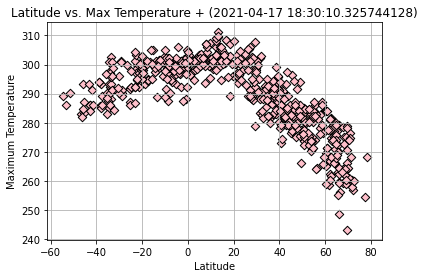

In [80]:
#cryptic_date = clean_city_data["Date"][0]
clean_city_data["Date"] = pd.to_datetime(clean_city_data["Date"],unit="s")
datestamp = clean_city_data["Date"].mean()

mpl.scatter(clean_city_data["Latitude"], clean_city_data["Max Temp"], color = "pink", marker = "D", alpha=1, edgecolor="black")
mpl.xlabel("Latitude")
mpl.ylabel("Maximum Temperature")
mpl.title(f"Latitude vs. Max Temperature + ({datestamp})")
mpl.grid()

## Latitude vs. Humidity Plot

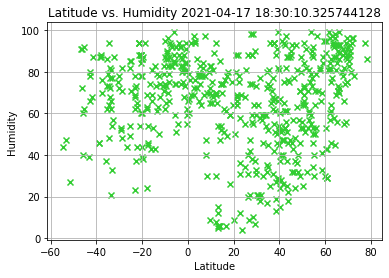

In [89]:

mpl.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], color = "limegreen", marker = "x", alpha=1, edgecolor="black")
mpl.xlabel("Latitude")
mpl.ylabel("Humidity")
mpl.title(f"Latitude vs. Humidity {datestamp}")
mpl.grid()


## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness 2021-04-17 18:30:10.325744128')

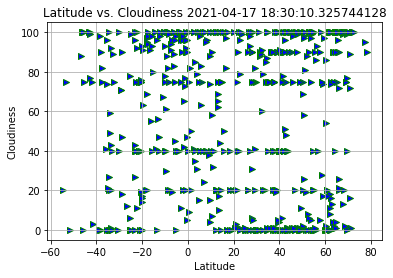

In [90]:


mpl.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"], color = "blue", marker = ">", alpha=1, edgecolor="green")
mpl.xlabel("Latitude")
mpl.ylabel("Cloudiness")
mpl.grid()
mpl.title(f"Latitude vs. Cloudiness {datestamp}")



## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed 2021-04-17 18:30:10.325744128')

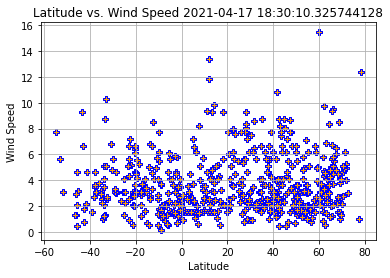

In [91]:

mpl.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], color = "orange", marker = "P", alpha=1, edgecolor="blue")

mpl.xlabel("Latitude")
mpl.ylabel("Wind Speed")
mpl.grid()
mpl.title(f"Latitude vs. Wind Speed {datestamp}")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


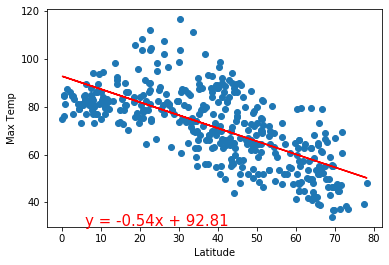

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


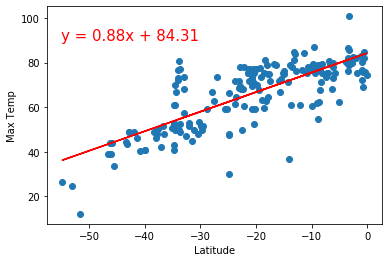

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


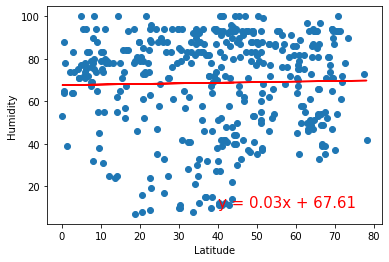

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


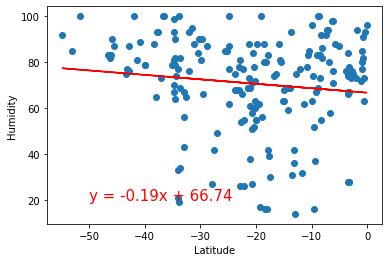

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


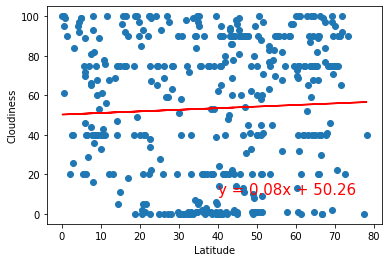

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


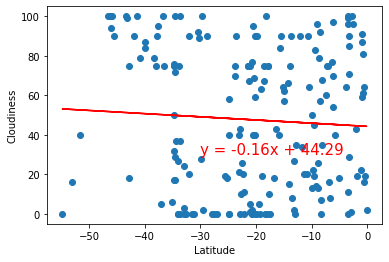

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


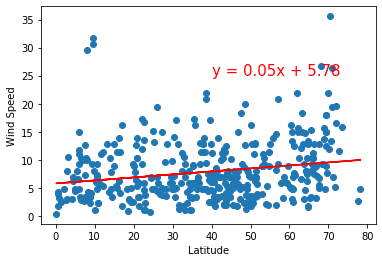

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


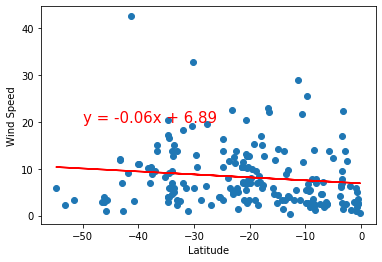